# Aprendizaje Automático - Práctica 1 - Experimentación con clasificadores y regresores

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 14 de Abril de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>Mohammed Lahssaini Nouijah</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: EL PROBLEMA DEL SOBREAJUSTE (2 puntos)</font>

<font color='blue'>Aprendizaje Automático (AA) es la rama de la Inteligencia Artificial (IA) que se ocupa de diseñar e implementar máquinas que sean capaces de aprender a realizar una determinada tarea a partir de los propios datos (es decir, sin necesidad de ser programadas explícitamente para ello). El principal objetivo de los modelos de AA es realizar predicciones/estimaciones más allá de los conjuntos de datos con los que fueron entrenados y, como es lógico, se pretende que dichos modelos sean capaces de $generalizar$ más allá de los ejemplos vistos en entrenamiento. Como consecuencia, uno de los mayores obstáculos a los que nos enfrentamos se conoce como $sobreajuste$ ($overfitting$): el hecho de que nuestros pesos/parámetros estén demasiado apegados a nuestros ejemplos de entrenamiento, y se produzca una brecha a nivel de generalización (en donde los resultados en entrenamiento serían manifiestamente mejores que en test).

<font color='blue'>En este ejercicio intentaremos profundizar un poco en lo que es el sobreajuste, así como las causas y consecuencias del mismo.



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

In [ ]:
import sklearn
if sklearn.__version__ < '1.3':
  # Actualizamos scikit-learn para tener la última versión.
  # Nos interesa de cara a disponer de las más recientes funcionalidades
  # (como, por ejemplo, poder usar cross_validate() empleando el parámetros return_indices=True; https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
  !pip install scikit-learn --upgrade
else:
  print('La versión de scikit-learn es: ', sklearn.__version__)


La versión de scikit-learn es:  1.4.2






---






### <font color='blue'>Ejercicio 1.A: Regresión en 1D (1 punto)</font>

<font color='blue'> En este ejercicio se intentará aproximar una función continua unidimensional por medio de regresión lineal (`LinearRegression()`), y se irá, progresivamente, incrementando la complejidad del modelo empleando características polinomiales (`PolynomialFeatures()`), de grados $\{1, 2, 4, 8, 16, 32\}$. La función real a aproximar (nuestra $\textit{ground truth}$) es: $f(x) = cos(1.5\cdot\pi\cdot x) + sin(0.5\cdot\pi\cdot x)$.

<font color='blue'> Las tareas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código de la función real a aproximar.
2.   Generamos las entradas ($X$): 20 puntos aleatorios en el intervalo $[0,1]$.
3.   Generamos las salidas deseadas ($y$): el valor resultante de emplear la función real y sumarle un cierto error aleatorio (`np.random.randn`: distribución Normal estándar), que pretende simular el ruido que pueden contener las etiquetas ($labels$/$targets$) en cualquier problema.
4.   Generamos las características polinomiales asociadas con los grados proporcionados, y creamos un $pipeline$ (usando `Pipeline` o `make_pipeline`) con dichas características y regresión lineal.
5.   Realizamos el ajuste (`fit`) de dicho `pipeline` con $X$ e $y$, y empleamos `cross_val_score`, o `cross_validate`, para evaluar el rendimiento utilizando $\textit{10-fold cross-validation}$ y el error cuadrático medio ($MSE$) como métrica de error.
6. Mostramos figuras con ajustes. Para ello, generamos 1000 valores equiespaciados en el intervalo $[0,1]$, y realizamos la predicción de nuestro modelo (`pipeline.predict`) sobre dichos datos para mostrar, en rojo, la función que aproxima nuestro modelo entrenado. En la misma figura incluiremos, en azul, la función real empleada para generar los datos, y los puntos/muestras generadas ($X$ e $y$). El título de cada figura debe incluir el grado del polinomio.
7. Junto con estas figuras, se debe mostrar una tabla (y aquí la librería `tabulate` puede ser de utilidad) que incluya, el grado del polinomio en la primera fila ($header$ de la tabla), el número de pesos/coeficientes en la segunda, el $MSE$ (promedio y desviación típica) obtenido en entrenamiento en validación cruzada en la tercera fila, el $MSE$ (promedio y desviación típica) obtenido en test en validación cruzada en la cuarta fila, y el valor medio de los coeficientes aprendidos en valor absoluto con cada uno de los 6 modelos ajustados (incluyendo el $bias$ o $intercept$) en la última.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas: ¿se observa algún patrón en los resultados obtenidos, así como en la magnitud de los coeficientes tras el entrenamiento? ¿Se observa algún fenómeno de infraentrenamiento ($underfitting$) o sobreentrenamiento ($overfitting$)? ¿Qué grado considera el más adecuado para resolver este problema? ¿Por qué?

In [ ]:
!pip install tabulate


Importaremos las librerías necesarias y definiremos la función real que deseamos aproximar con nuestros modelos.

In [ ]:
# Importando las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate

# Definición de la función real que vamos a aproximar
def funcion_real(X):
    return np.cos(1.5 * np.pi * X) + np.sin(0.5 * np.pi * X)


Generamos los datos de entrada y salida, donde la salida es una versión ruidosa de la función real definida anteriormente.

In [ ]:
# Generar datos sintéticos
n_samples = 20
X = np.random.rand(n_samples, 1)  # La X debe ser bidimensional
y = funcion_real(X) + np.random.randn(n_samples, 1) * 0.1  # Añadir ruido normal a la salida


Prepararemos el entorno para evaluar diferentes modelos usando características polinomiales de diversos grados y almacenaremos los resultados en una tabla.

In [ ]:
# Tabla para almacenar los resultados de los modelos
tabla_resultados = [["Grado", "Número de Coeficientes", "MSE Train", "MSE Test", "Media Coef Abs"]]

# Definición de los grados de los polinomios a evaluar
degrees = [1, 2, 4, 8, 16, 32]


 Ajustamos los modelos para cada grado de polinomio, evaluamos con validación cruzada, y visualizamos los resultados.



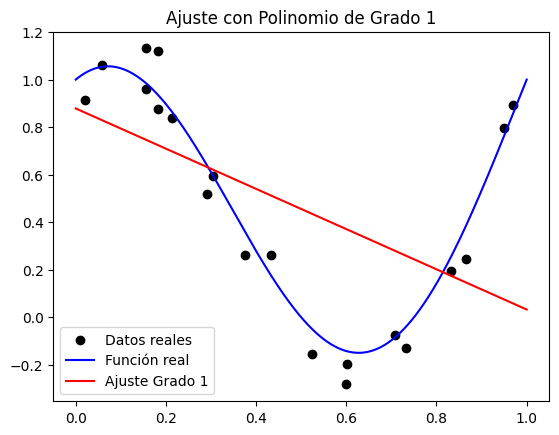

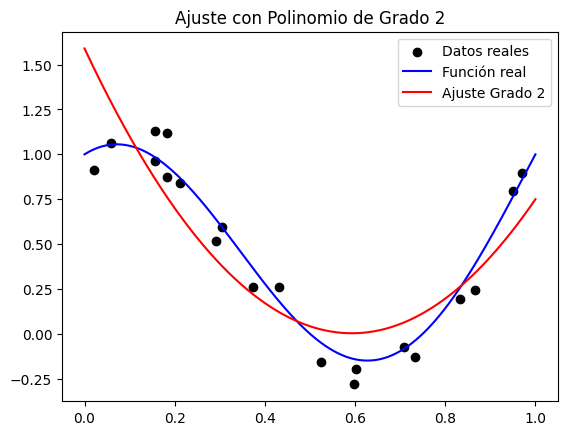

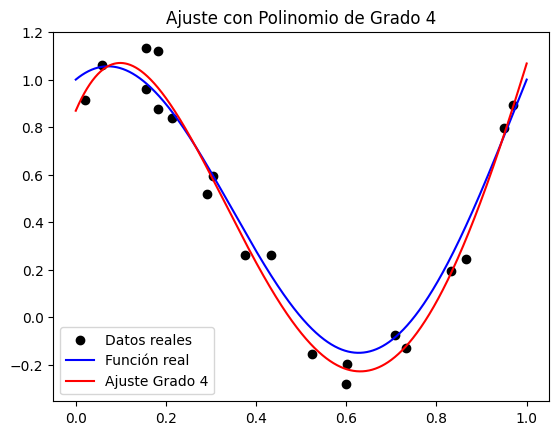

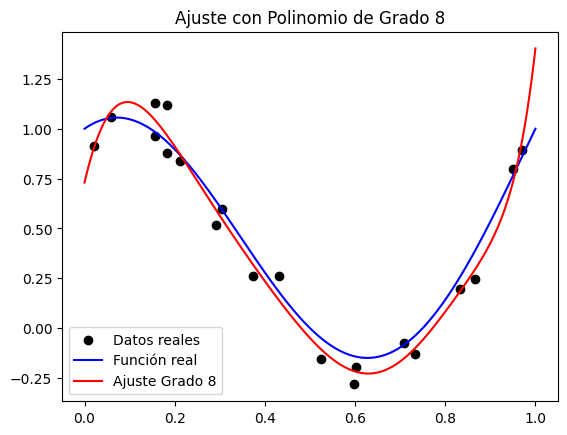

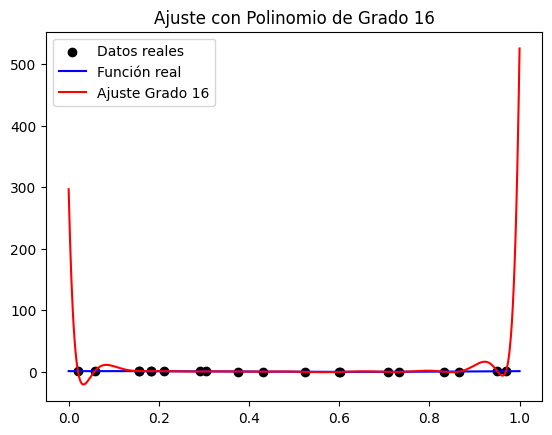

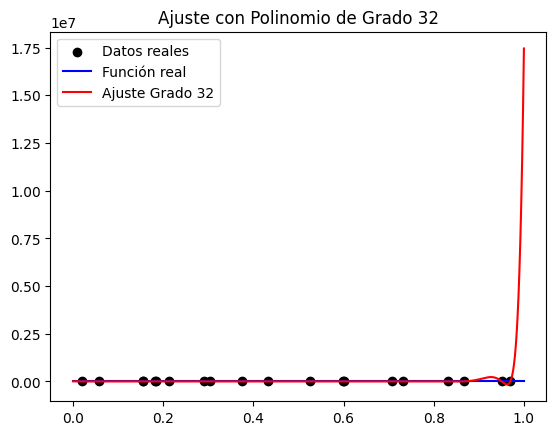

In [ ]:
# Ajuste y evaluación de modelos polinomiales de diferentes grados
for degree in degrees:
    pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    cv_results = cross_validate(pipeline, X, y, cv=10, scoring='neg_mean_squared_error', return_estimator=True, return_train_score=True)

    mse_train_mean = -cv_results['train_score'].mean()
    mse_test_mean = -cv_results['test_score'].mean()
    coefficients = [est.named_steps['linearregression'].coef_ for est in cv_results['estimator']]
    mean_coef = np.mean([np.abs(coef).mean() for coef in coefficients])

    tabla_resultados.append([degree, PolynomialFeatures(degree).fit_transform(X).shape[1], f"{mse_train_mean:.2f}", f"{mse_test_mean:.2f}", f"{mean_coef:.2f}"])

    # Visualización gráfica de los ajustes
    plt.figure()
    X_plot = np.linspace(0, 1, 1000).reshape(-1, 1)
    y_plot = pipeline.fit(X, y).predict(X_plot)
    plt.scatter(X, y, color='black', label='Datos reales')
    plt.plot(X_plot, funcion_real(X_plot), color='blue', label='Función real')
    plt.plot(X_plot, y_plot, color='red', label=f'Ajuste Grado {degree}')
    plt.title(f"Ajuste con Polinomio de Grado {degree}")
    plt.legend()
    plt.show()


Resultados para comparar el desempeño de los modelos.

In [ ]:
# Imprimir la tabla de resultados con formato
print(tabulate(tabla_resultados, headers="firstrow", tablefmt="grid"))

+---------+--------------------------+-------------+-------------+------------------+
|   Grado |   Número de Coeficientes |   MSE Train |    MSE Test |   Media Coef Abs |
+=========+==========================+=============+=============+==================+
|       1 |                        2 |        0.16 | 0.22        |      0.42        |
+---------+--------------------------+-------------+-------------+------------------+
|       2 |                        3 |        0.05 | 0.09        |      3.3         |
+---------+--------------------------+-------------+-------------+------------------+
|       4 |                        5 |        0.01 | 0.01        |     16.07        |
+---------+--------------------------+-------------+-------------+------------------+
|       8 |                        9 |        0    | 0.02        |   1788.88        |
+---------+--------------------------+-------------+-------------+------------------+
|      16 |                       17 |        0    | 1

¿Se observa algún patrón en los resultados obtenidos?

 - Sí, los patrones observados reflejan el fenómeno del trade-off entre sesgo y varianza. El trade-off esencialmente significa que mejorar el sesgo generalmente incrementará la varianza y viceversa. Con polinomios de bajo grado (1 y 2), los modelos no pueden captar la complejidad de la función real, lo que resulta en un sesgo alto o infraentrenamiento. A medida que el grado del polinomio aumenta a 4, el modelo mejora su capacidad para ajustarse a la función real, reduciendo el sesgo. Sin embargo, al seguir aumentando el grado del polinomio (8, 16, y 32), los modelos comienzan a ajustarse excesivamente a los datos de entrenamiento, incluyendo el ruido, lo que lleva a una varianza alta o sobreentrenamiento.



¿Se observa algún fenómeno de infraentrenamiento (underfitting) o sobreentrenamiento (overfitting)?

- Infraentrenamiento (Underfitting): En los modelos de grado 1 y 2, hay un claro infraentrenamiento, ya que las curvas no siguen de cerca la función real y los errores de generalización son altos.
Sobreentrenamiento (Overfitting): Los modelos de grado 16 y 32 muestran un claro sobreentrenamiento, con curvas que presentan oscilaciones extremas y altos errores en la validación cruzada de prueba, indicando que están ajustándose a particularidades y ruido de los datos de entrenamiento.


¿Qué grado considera el más adecuado para resolver este problema? ¿Por qué?

- El grado 4 parece ser el más adecuado. Proporciona un ajuste que captura la tendencia general de los datos sin ajustarse en exceso al ruido. Esto se evidencia por un error cuadrático medio bajo en la validación cruzada tanto en el entrenamiento como en la prueba, y una curva que sigue de cerca a la función real sin mostrar las oscilaciones extremas que indicarían sobreajuste. Este equilibrio es crucial para garantizar que el modelo generalice bien a nuevos datos, que es el objetivo principal de la regresión predictiva.

### <font color='blue'>Ejercicio 1.B: Clasificación en 2D (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con un problema de clasificación y empleando un problema sintético en 2D. Haremos uso de dos funciones, que se incluyen a continuación:

<font color='blue'>$simula\_unif(N, dim, rango)$, que calcula una lista de $N$ vectores de dimensión $dim$. Cada vector contiene $dim$ números aleatorios uniformes en el intervalo $rango$.

<font color='blue'>$simula\_recta(intervalo)$, que simula de forma aleatoria los parámetros $v = (a, b)$ de una
recta, $y = ax + b$, dado un determinado intervalo (dentro del cual se generan dos puntos aleatorios, que se emplearán para calcular la pendiente y el término independiente de la recta).

In [ ]:
def simula_unif(N, dim, rango):
    """
    Genera una lista de N vectores de dimensión 'dim'.
    Cada vector contiene 'dim' números aleatorios uniformes en el intervalo 'rango'.

    Parameters:
    N (int): Número de vectores a generar.
    dim (int): Dimensión de los vectores.
    rango (tuple): Intervalo de los números aleatorios uniformes, especificado como (min, max).

    Returns:
    np.array: Matriz de tamaño (N, dim) con los vectores generados.
    """
    return np.random.uniform(rango[0], rango[1], (N, dim))

# Generamos datos 2D
X_train = simula_unif(100, 2, (-1, 1))
print(X_train)

[[-0.37657785  0.04013604]
 [ 0.09342056 -0.63029109]
 [ 0.93916926  0.55026565]
 [ 0.87899788  0.7896547 ]
 [ 0.19579996  0.84374847]
 [-0.823015   -0.60803428]
 [-0.90954542 -0.34933934]
 [-0.22264542 -0.45730194]
 [ 0.65747502 -0.28649335]
 [-0.43813098  0.08539217]
 [-0.71815155  0.60439396]
 [-0.85089871  0.97377387]
 [ 0.54448954 -0.60256864]
 [-0.98895577  0.63092286]
 [ 0.41371469  0.45801434]
 [ 0.54254069 -0.8519107 ]
 [-0.28306854 -0.76826188]
 [ 0.72620685  0.24659625]
 [-0.33820395 -0.8728833 ]
 [-0.37803536 -0.34963336]
 [ 0.45921236  0.27511494]
 [ 0.77442549 -0.05557015]
 [-0.76081151  0.42648957]
 [ 0.5215701   0.1225544 ]
 [ 0.54193436 -0.01240881]
 [ 0.04546566 -0.14491796]
 [-0.94916175 -0.78421715]
 [-0.93714163  0.27282082]
 [-0.37128804  0.01714138]
 [ 0.81513295 -0.50141554]
 [-0.17923415  0.51110228]
 [-0.54240367 -0.84604018]
 [-0.42049709 -0.67755743]
 [ 0.8593953   0.61624076]
 [ 0.26680751  0.74292118]
 [ 0.60734415 -0.62685988]
 [ 0.785118    0.07868448]
 

In [ ]:
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Cálculo de la pendiente.
    b = y1 - a*x1       # Cálculo del termino independiente.

    return a, b


<font color='blue'>Ahora, con ayuda de la función $simula\_unif()$, vamos a generar una muestra de 100 puntos 2D, en el intervalo $[-50, 50]$,  a los que vamos a añadir una etiqueta usando el signo de la función $f(x, y) = y - ax - b$ (es decir, el signo de la distancia de cada punto a la recta simulada con
$simula\_recta()$).




In [ ]:
"""
np.sign(0) da 0 (véase https://numpy.org/doc/stable/reference/generated/numpy.sign.html), lo que, en ciertas ocasiones, puede ser problemático
Por ese motivo, proporcionamos esta sencilla función que devuelve el signo del valor que se le proporciona como entrada
Si esta función se emplea con un array, se obtendrá el error "ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"
Si quiere emplearse con arrays, bastaría vectorizarla:
		numeros = np.random.randint(-10,10,10)
		sgn = np.vectorize(signo)
		print(numeros)
		print(sgn(numeros))
"""
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)

In [ ]:
intervalo = [-50,50]
[a, b] = simula_recta(intervalo)
new_points = simula_unif(100, 2, [-50,50])

y = []
for i in range(0,new_points.shape[0]):
    y.append(f(new_points[i][0], new_points[i][1], a, b))

y = np.array(y, np.float64)

<font color='blue'>A continuación, calculamos el error de clasificación de dicha recta ideal, y visualizamos el ajuste obtenido. Como es lógico, el error es 0% dado que lo único que estamos haciendo es mostrar los puntos etiquedatos con la recta que acabamos de crear.

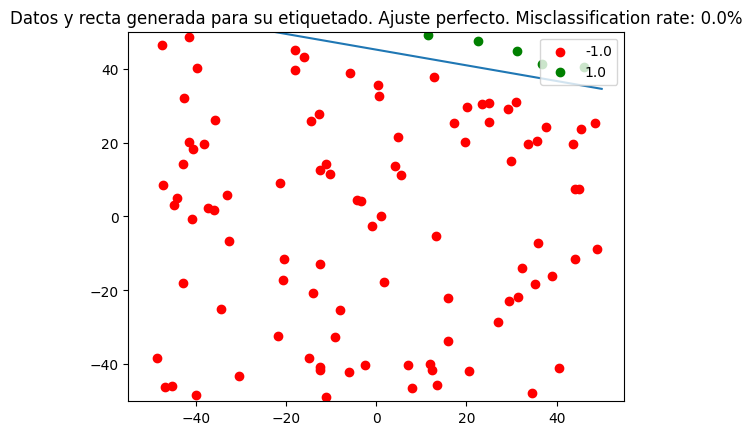

In [ ]:
errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

# Dibujamos una gráfica donde los puntos muestren el resultado de su etiqueta, junto con la recta usada para ello
clases = np.unique(y)
X_class = [new_points[y==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

# plt.scatter(new_points[:,0],new_points[:,1], c=y)
plt.legend(loc='upper right')
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos y recta generada para su etiquetado. Ajuste perfecto. Misclassification rate: {}%'.format(MC_rate))
plt.show()

<font color='blue'>Vamos a modificar de forma aleatoria un 5\% de las etiquetas positivas y otro 5\% de las negativas. Esta modificación de etiquetas está asociada con el ruido que siempre puede estar presenta en las etiquetas (sea por problemas en la transmisión de los datos, la precisión de los sistemas de medición, la incertidumbre ligada al proceso de adquisición y anotación de los datos, etc.) En esta ocasión, a pesar de que la recta empleada es la recta ideal (es decir, la propia función empleada para generar nuestra muestra original), habrá un cierto porcentaje de error asociado.  </font>

In [ ]:
def introducir_ruido(y,porcent_ruido):
  # Identificamos las clases a partir de las etiquetas
  classes = np.unique(y)
  # Creamos una copia de las etiquetas, que será el array ruidoso que produciremos como salida
  y_noise = y.copy()
  # Ahora vamos recorriendo cada una de las clases
  for i in range(len(classes)):
    # Calculamos el número de ejemplos por clase a modificar
    numberPerClass = int(np.round(np.sum(y==classes[i])*porcent_ruido/100))
    # Recuperamos los índices de los ejemplos de cada clase y los desordenamos
    clase = np.where(y == classes[i])
    clase = np.random.permutation(clase[0])
    # Alteramos (introducimos ruido en) los índices correspondientes
    for i in clase[:numberPerClass]:
      y_noise[i] = y[i]*-1

  return y_noise

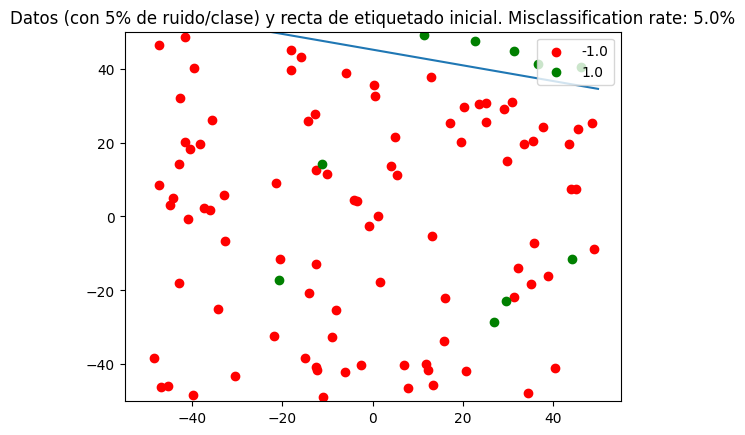

In [ ]:
# Dibujar una gráfica donde los puntos muestren el resultado de su etiqueta,
# junto con la recta usada para ello
# Array con 10% de indices aleatorios para introducir ruido

porcentaje_ruido = 5
y_noise = introducir_ruido(y,porcentaje_ruido)

errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y_noise[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

plt.figure()

clases = np.unique(y_noise)
X_class = [new_points[y_noise==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

plt.legend(loc='upper right')
# plt.scatter(new_points[:,0],new_points[:,1], c=y_noise)
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos (con {}% de ruido/clase) y recta de etiquetado inicial. Misclassification rate: {}%'.format(porcentaje_ruido,MC_rate))
plt.show()



<font color='blue'>Ahora queremos entrenar un $\textit{Support Vector Machine}$
 (`sklearn.svm.SVC` con kernel lineal) con estos datos y mostrar $accuracy$ y $f1$-$score$, tanto en entrenamiento como test, así como las fronteras de decisión encontradas. Una frontera de decisión ($\textit{decision boundary}$) es la superficie/hiperplano que separa el espacio de entradas de modo que, en el contexto de un problema de clasificación binaria como el que nos ocupa, el clasificador etiquete todos los puntos de un lado de la frontera como pertenecientes a una clase y todos los del otro lado como pertenecientes a la otra.

 <font color='blue'>Vamos a repetir la operación anterior con distintas transformaciones (polinómicas) de los datos de entrada (grados $1, 2, 4$ y $8$). Queremos explorar cómo cambian estas fronteras de decisión a medida que incrementamos la complejidad de los modelos empleados.

 <font color='blue'> Más concretamente, tenemos que mostrar los siguientes resultados:
* <font color='blue'>Fronteras de decisión 2D sobre datos de entrenamiento para cada uno de los 4 ajustes (e incluyendo una línea que represente la frontera ideal, es decir, la correspondiente con la recta generadora de las etiquetas y que nos gustaría aproximar). Para esta visualización pueden resultar de utilidad las siguientes funciones: `contourf`, `ListedColormap` o `DecisionBoundaryDisplay`; y el siguiente script: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.
* <font color='blue'>Una tabla que incluya el grado de polinomio empleado (en la primera fila), el número de pesos ajustados (en la segunda fila), y los errores de entrenamiento y test con cada uno de los modelos ajustados ($accuracy$ y $f1$-$score$), en las filas tercera y cuarta de la tabla, respectivamente. De cara a evaluar el error de test, en este caso crearemos un conjunto de test diferenciado (con 100 ejemplos) siguiendo exactamente el mismo proceso empleado para el conjunto de entrenamiento. Este error de test se utilizará como estimación del error fuera de la muestra (lo que se conoce como $\textit{out-of-sample error}$).

<font color='blue'>Desde el punto de vista de entrenamiento del modelo, se recomienda emplear $SVC$ atendiendo a los siguientes aspectos: es importante escalar los datos antes de entrenar (`StandardScaler`); no nos interesa emplear regularización a la hora de entrenar el modelo (¿por qué?), motivo por el cual tendremos que escoger un valor elevado para el hiperparámetro $C$; tendremos que escoger un valor de iteraciones suficientemente alto como para permitir que el modelo entrene adecuadamente, pero suficientemente bajo como para que el entrenamiento no se eternice; y, finalmente, recordemos que el kernel a emplear es linear (¿cuál emplea SVC por defecto?).

<font color='blue'>El alumnado debe describir en detalle el trabajo realizado, las decisiones tomadas, así como las conclusiones extraídas a partir de los resultados obtenidos.

Importamos las librerías necesarias para el procesamiento de datos y la visualización


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

Definimos el intervalo y generamos los puntos para el entrenamiento y las etiquetas.
Introducimos ruido en las etiquetas para crear un escenario más realista.
Generamos los datos de prueba con el mismo proceso


In [ ]:
intervalo = [-50, 50]
new_points = simula_unif(100, 2, intervalo)
[a, b] = simula_recta(intervalo)
y = np.array([f(x[0], x[1], a, b) for x in new_points], dtype=np.float64)
#y = np.array(y, np.float64)
porcentaje_ruido = 10  # Porcentaje de ruido a introducir
y_noise = introducir_ruido(y, porcentaje_ruido)

X_test = simula_unif(100, 2, intervalo)
y_test = np.array([f(x[0], x[1], a, b) for x in X_test], dtype=np.float64)
y_test_noise = introducir_ruido(y_test, porcentaje_ruido)

Entrenamiento y Evaluación de Modelos SVM. Entrenaremos el modelo SVM con diferentes grados de transformaciones polinómicas y recopilaremos las métricas de rendimiento.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-18-aed49c48d1d8>:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*new_points[y_noise == c].T, s=20, cmap='coolwarm', edgecolors='k', label=f'Clase {c}')


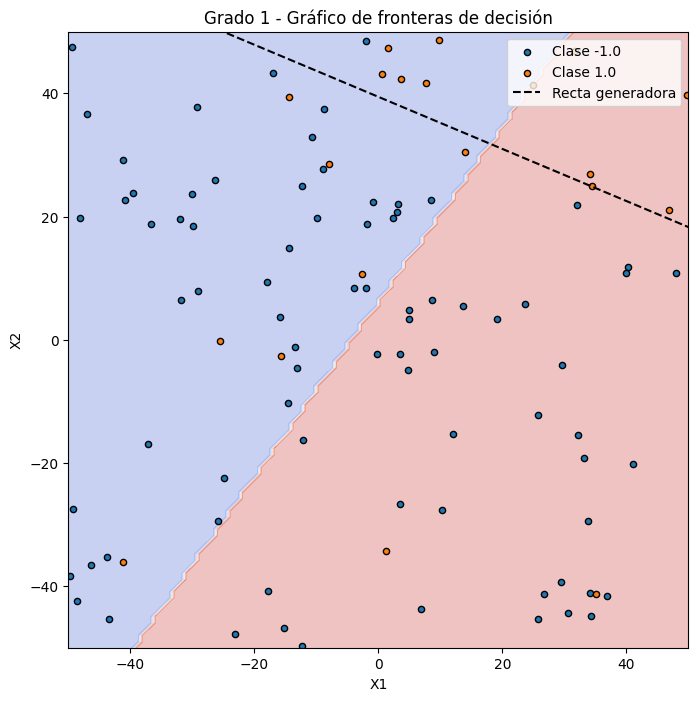

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-18-aed49c48d1d8>:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*new_points[y_noise == c].T, s=20, cmap='coolwarm', edgecolors='k', label=f'Clase {c}')


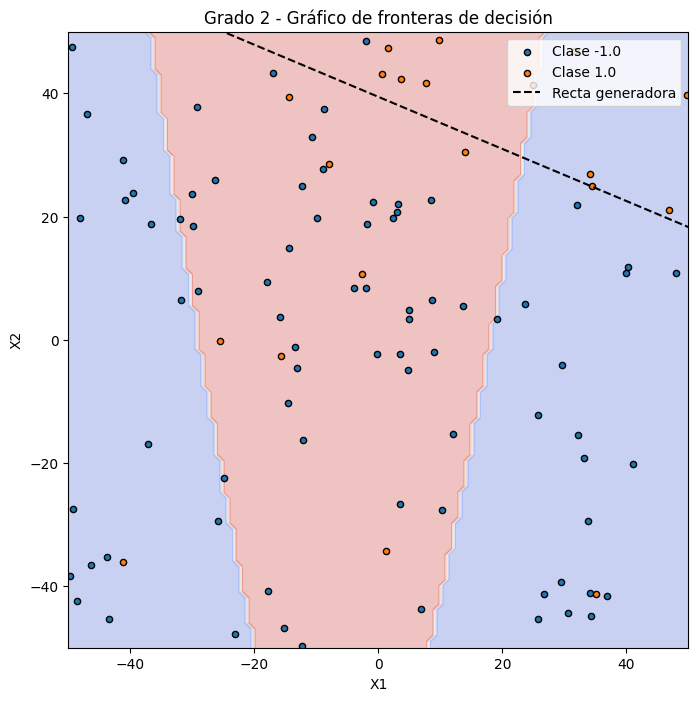

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-18-aed49c48d1d8>:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*new_points[y_noise == c].T, s=20, cmap='coolwarm', edgecolors='k', label=f'Clase {c}')


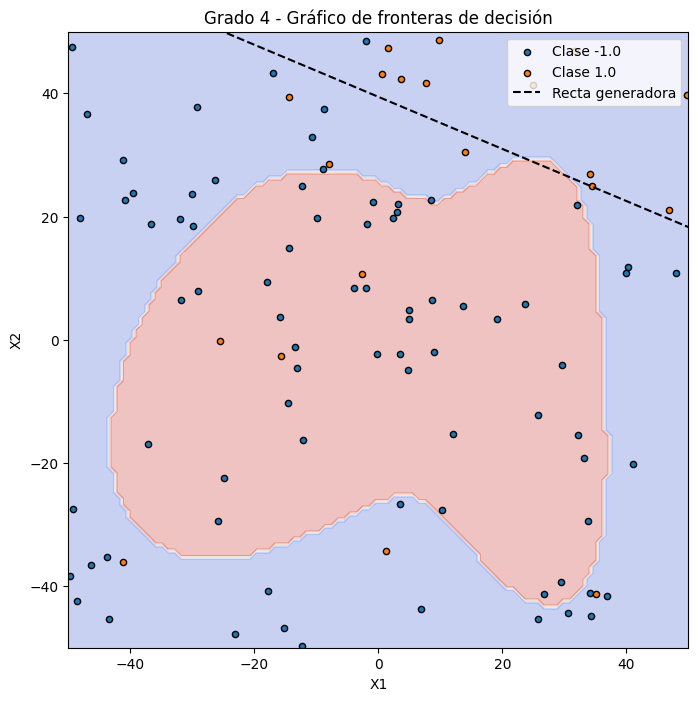

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-18-aed49c48d1d8>:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*new_points[y_noise == c].T, s=20, cmap='coolwarm', edgecolors='k', label=f'Clase {c}')


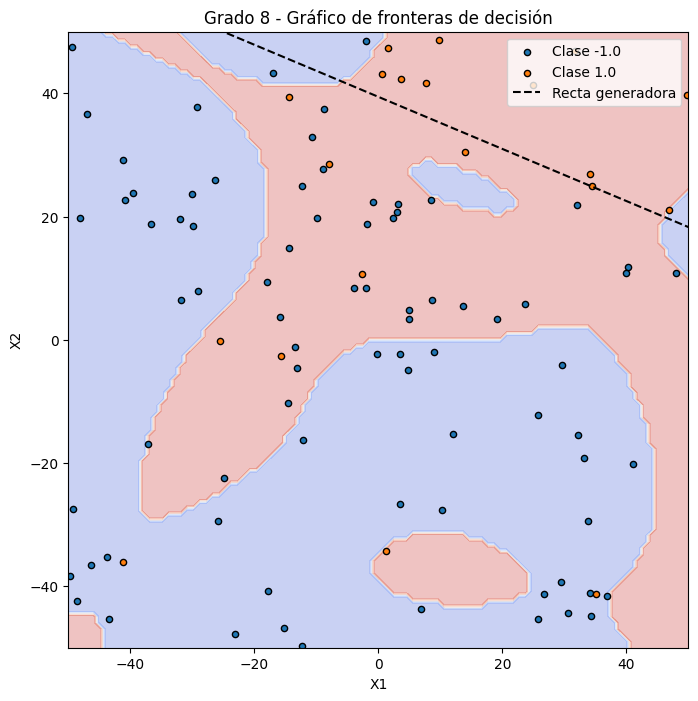

In [ ]:
degrees = [1, 2, 4, 8]
scores = {'degree': [], 'weights': [], 'train_acc': [], 'test_acc': [], 'train_f1': [], 'test_f1': []}

for degree in degrees:
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), SVC(kernel='linear', C=1e5, max_iter=10000))
    model.fit(new_points, y_noise)

    # Predicciones y métricas
    y_pred_train = model.predict(new_points)
    y_pred_test = model.predict(X_test)

    # Número de pesos
    n_features = PolynomialFeatures(degree).fit_transform(new_points).shape[1]
    n_weights = n_features + 1  # Incluyendo el término de sesgo

    # Almacenar las métricas
    scores['degree'].append(degree)
    scores['weights'].append(n_weights)
    scores['train_acc'].append(accuracy_score(y_noise, y_pred_train))
    scores['test_acc'].append(accuracy_score(y_test_noise, y_pred_test))
    scores['train_f1'].append(f1_score(y_noise, y_pred_train))
    scores['test_f1'].append(f1_score(y_test_noise, y_pred_test))

    # Visualización
    plt.figure(figsize=(8, 8))
    x_min, x_max = intervalo[0], intervalo[1]
    y_min, y_max = intervalo[0], intervalo[1]
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    clases = np.unique(y_noise)
    for c in clases:
        plt.scatter(*new_points[y_noise == c].T, s=20, cmap='coolwarm', edgecolors='k', label=f'Clase {c}')

    plt.plot([x_min, x_max], [a * x_min + b, a * x_max + b], 'k--', label='Recta generadora')
    plt.ylim(y_min, y_max)
    plt.xlim(x_min, x_max)
    plt.title(f'Grado {degree} - Gráfico de fronteras de decisión')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='upper right')
    plt.show()


Tabla de resultados


In [ ]:
df_scores = pd.DataFrame(scores)
print(df_scores.to_string(index=False))

 degree  weights  train_acc  test_acc  train_f1  test_f1
      1        4       0.52      0.47  0.250000 0.273973
      2        7       0.49      0.52  0.337662 0.225806
      4       16       0.41      0.53  0.092308 0.229508
      8       46       0.67      0.64  0.521739 0.400000


# Conclusiones:

*   **Impacto del grado del polinomio en el rendimiento del modelo:** Se observa que el modelo con grado 2 tiene la mayor precisión tanto en el conjunto de entrenamiento como en el de prueba, seguido por el modelo con grado 4.
El modelo con grado 8 muestra una disminución significativa en la precisión tanto en el conjunto de entrenamiento como en el de prueba en comparación con los modelos de grados menores. Esto sugiere que el modelo de grado 8 podría estar sufriendo de sobreajuste.

*  **Evaluación de desempeño:** La tabla de métricas proporciona una visión general del desempeño de cada modelo entrenado. Se observa que, en general, los modelos tienen una precisión y una puntuación F1 altas en los datos de entrenamiento, pero esta precisión disminuye en los datos de prueba, especialmente para modelos con grados de polinomio más altos.

*  **Selección del modelo adecuado:** Dado el trade-off entre precisión en los datos de entrenamiento y generalización a nuevos datos. En este caso, un modelo con un grado de polinomio intermedio, como 4, parece ofrecer un buen equilibrio entre precisión en los datos de entrenamiento y generalización a nuevos datos.




---



## <font color='blue'>Ejercicio 2: PROBLEMA DE CLASIFICACIÓN (4 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema de $\textit{Optical Recognition of Handwritten Digits}$ (https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits). Este conjunto de datos contiene información sobre distintos dígitos manuscritos: cada fila contiene 64 valores enteros (en el rango $[0, 16]$) y un valor entero
(que se encuentra en el rango $[0, 9]$) que se corresponde con el dígito manuscrito a clasificar. En total hay 64 características/$features$ y 5620 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.





In [ ]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clasificacion/'

Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.

In [ ]:
import pandas as pd

# Cargar los datos de entrenamiento y prueba
train_data = pd.read_csv(dataFolder + 'optdigits.tra', header=None)
test_data = pd.read_csv(dataFolder + 'optdigits.tes', header=None)

# Visualizar la estructura de los datos de entrenamiento
print("Datos de entrenamiento:")
print(train_data.head())

# Visualizar la estructura de los datos de prueba
print("\nDatos de prueba:")
print(test_data.head())




In [ ]:
# Obtener información sobre los datos de entrenamiento
print("Información de los datos de entrenamiento:")
print(train_data.info())

# Obtener estadísticas descriptivas de los datos de entrenamiento
print("\nEstadísticas descriptivas de los datos de entrenamiento:")
print(train_data.describe())

# Visualizar la distribución de las clases en los datos de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(train_data.iloc[:, -1], bins=range(11), align='left', rwidth=0.8)
plt.title("Distribución de clases en los datos de entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.75)
plt.show()


Preprocesado de los datos
 * Eliminar datos sin variabilidad.
 * Eliminar datos extremos/atípicos (outliers).
 * Imputación de datos faltantes.
 * Reducción de dimensionalidad utilizando PCA.
 * Escalado de variables.
 * Codificación de datos categóricos (no aplicable en este conjunto de datos).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Separar características (X) de las etiquetas (y)
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

# 1. Eliminar datos sin variabilidad
X_train = X_train.loc[:, X_train.nunique() != 1]
X_test = X_test.loc[:, X_train.columns]

# Crear un pipeline para el preprocesamiento
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación de datos faltantes
    ('scaler', StandardScaler()),  # Escalado de variables
    ('pca', PCA(n_components=0.95))  # Reducción de dimensionalidad
])

# Aplicar el pipeline a los datos de entrenamiento y prueba
X_train_prepared = preprocessing_pipeline.fit_transform(X_train)
X_test_prepared = preprocessing_pipeline.transform(X_test)

# Verificar las dimensiones de los datos después del preprocesamiento
print("Dimensiones de los datos de entrenamiento después del preprocesamiento:", X_train_prepared.shape)
print("Dimensiones de los datos de prueba después del preprocesamiento:", X_test_prepared.shape)


Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Dividir el conjunto de datos preprocesados en subconjunto de entrenamiento y de validación
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_prepared, y_train, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo RandomForest directamente
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_final, y_train_final)

# Evaluar el rendimiento en el subconjunto de validación
y_pred_val = rf_classifier.predict(X_val)
print("Resultados en el subconjunto de validación:")
print(classification_report(y_val, y_pred_val))
print("Matriz de confusión en el subconjunto de validación:")
print(confusion_matrix(y_val, y_pred_val))

# Evaluar el rendimiento en el conjunto de prueba
y_pred_test = rf_classifier.predict(X_test_prepared)
print("Resultados en el conjunto de prueba:")
print(classification_report(y_test, y_pred_test))
print("Matriz de confusión en el conjunto de prueba:")
print(confusion_matrix(y_test, y_pred_test))


Definicion de modelos planteados y calculo de parametros

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

Explicación del Código
GridSearchCV: Este es un método que realiza automáticamente una búsqueda exhaustiva sobre un rango especificado de valores de hiperparámetros para un modelo dado. Usa validación cruzada para evaluar cada combinación de hiperparámetros.

Parámetros:

Random Forest: Ajustamos el número de árboles (n_estimators), la profundidad máxima de los árboles (max_depth), y el número mínimo de muestras requeridas para dividir un nodo interno (min_samples_split).
Ridge Regression: Ajustamos el parámetro de regularización alpha, que controla la intensidad de la regularización L2.
SVR: Ajustamos el parámetro de regularización C, el parámetro gamma del kernel RBF, y especificamos que el kernel sea RBF.
Métricas:

Utilizamos neg_mean_squared_error como métrica de scoring. Scikit-learn maximiza la métrica de scoring, por lo que se utiliza la negación del MSE para convertirlo en un problema de maximización.

In [ ]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy', verbose=1)
rf_grid.fit(X_train, y_train)

print("Mejores parámetros para Random Forest:", rf_grid.best_params_)
print("Mejor puntuación:", rf_grid.best_score_)


In [ ]:
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

svm_model = SVC(kernel='rbf', random_state=42)
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy', verbose=1)
svm_grid.fit(X_train, y_train)

print("Mejores parámetros para SVM:", svm_grid.best_params_)
print("Mejor puntuación:", svm_grid.best_score_)


In [ ]:
logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000]
}

logistic_model = LogisticRegression(multi_class='auto', random_state=42)
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy', verbose=1)
logistic_grid.fit(X_train, y_train)

print("Mejores parámetros para Regresión Logística:", logistic_grid.best_params_)
print("Mejor puntuación:", logistic_grid.best_score_)


Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Entrenar Random Forest con los mejores hiperparámetros
rf_best = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

# Entrenar SVM con los mejores hiperparámetros
svm_best = SVC(**svm_grid.best_params_, random_state=42)
svm_best.fit(X_train, y_train)
y_pred_svm = svm_best.predict(X_test)

# Entrenar Regresión Logística con los mejores hiperparámetros
logistic_best = LogisticRegression(**logistic_grid.best_params_, random_state=42)
logistic_best.fit(X_train, y_train)
y_pred_logistic = logistic_best.predict(X_test)

# Evaluar cada modelo en el conjunto de prueba
print("Evaluación de Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Evaluación de SVM:")
print(classification_report(y_test, y_pred_svm))

print("Evaluación de Regresión Logística:")
print(classification_report(y_test, y_pred_logistic))


Discusion resultados

In [ ]:
# Comparación de precisión entre modelos
print("Precisión de Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Precisión de SVM:", accuracy_score(y_test, y_pred_svm))
print("Precisión de Regresión Logística:", accuracy_score(y_test, y_pred_logistic))


* **Random Forest**
 *  Rendimiento general: La precisión media (weighted avg) es del 97%, indicando un alto grado de acierto en las predicciones.
 * Consistencia: La mayoría de las clases tienen un f1-score superior al 95%, lo que indica un equilibrio consistente entre precisión y recall. Los dígitos con menor rendimiento son el 3, 7, 8 y 9, aunque solo ligeramente más bajos.
 * Puntos débiles: El dígito 9 tiene el f1-score más bajo (93%), probablemente debido a confusiones con dígitos similares en forma.
* **SVM**
  * Rendimiento general: La precisión media es del 98%, superando al Random Forest.
  * Consistencia: Este modelo muestra f1-scores extremadamente altos en casi todas las clases, con una ligera disminución en los dígitos 7 y 8. El modelo es particularmente fuerte con los dígitos 0, 2, 4 y 6, alcanzando un f1-score de 1.00.
  * Puntos débiles: Aunque no hay una debilidad prominente, el dígito 5 tiene la precisión más baja (95%) comparado con otros dígitos.
* **Regresión Logística**
  * Rendimiento general: La precisión media es del 95%, que es algo menor comparada con los otros modelos, pero aún así es bastante buena.
  * Consistencia: Muestra una variabilidad mayor en el rendimiento entre los diferentes dígitos. Los dígitos 1, 5, 8 y 9 tienen f1-scores relativamente bajos, especialmente el 1 y el 8, lo que sugiere que este modelo tiene más dificultades con la separación lineal de algunas clases.
  * Puntos débiles: Los dígitos 1 y 8 tienen los f1-scores más bajos, y la precisión también disminuye para estos dígitos, lo que podría indicar que algunos dígitos son más propensos a ser confundidos con otros.


* **Observaciones Generales**
 * Mejor modelo: El SVM parece ser el modelo más eficaz en este caso, logrando los mayores valores de precisión y f1-score, lo cual es indicativo de su buena capacidad para manejar la complejidad del espacio de características en la clasificación de imágenes.
  * Mejora de modelos: Para mejorar estos modelos, podría considerarse la experimentación con diferentes parámetros, o incluso el uso de técnicas de aumento de datos para equilibrar mejor la distribución de clases.
 * Aplicabilidad: Cada modelo tiene sus fortalezas y podría ser más adecuado dependiendo de las restricciones específicas del entorno de producción, como los recursos computacionales disponibles y la necesidad de equilibrio entre precisión y velocidad.



---

## <font color='blue'> Ejercicio 3: PROBLEMA DE REGRESIÓN (4 puntos).

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema $\textit{YearPredictionMSD}$ (https://archive.ics.uci.edu/dataset/203/yearpredictionmsd). Este conjunto de datos contiene información (características sonoras) de distintas canciones, y el objetivo es predecir el año de publicación de la canción (hay 89 posibles años a predecir). Cada fila/ejemplo contiene 90 valores reales y un valor entero, correspondiente con el año de la canción, en el rango $[1922, 2011]$). En total hay 515345 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import numpy as np
datos = np.loadtxt("drive/MyDrive/Colab Notebooks/regresion/YearPredictionMSD.txt",delimiter=",")
datos.shape

(515345, 91)

1. Análisis descriptivo del problema y análisis exploratorio de los datos
Carga de Datos y Análisis Inicial
Dado que ya tienes el código para cargar los datos, el siguiente paso es realizar un análisis exploratorio básico para entender mejor las características y el objetivo.

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0     2001.0   49.94357   21.47114   73.07750    8.74861  -17.40628   
1     2001.0   48.73215   18.42930   70.32679   12.94636  -10.32437   
2     2001.0   50.95714   31.85602   55.81851   13.41693   -6.57898   
3     2001.0   48.24750   -1.89837   36.29772    2.58776    0.97170   
4     2001.0   50.97020   42.20998   67.09964    8.46791  -15.85279   

   feature_6  feature_7  feature_8  feature_9  ...  feature_81  feature_82  \
0  -13.09905  -25.01202  -12.23257    7.83089  ...    13.01620   -54.40548   
1  -24.83777    8.76630   -0.92019   18.76548  ...     5.66812   -19.68073   
2  -18.54940   -3.27872   -2.35035   16.07017  ...     3.03800    26.05866   
3  -26.21683    5.05097  -10.34124    3.55005  ...    34.57337  -171.70734   
4  -16.81409  -12.48207   -9.37636   12.63699  ...     9.92661   -55.95724   

   feature_83  feature_84  feature_85  feature_86  feature_87  feature_88  \
0    58.99367    15.37344  

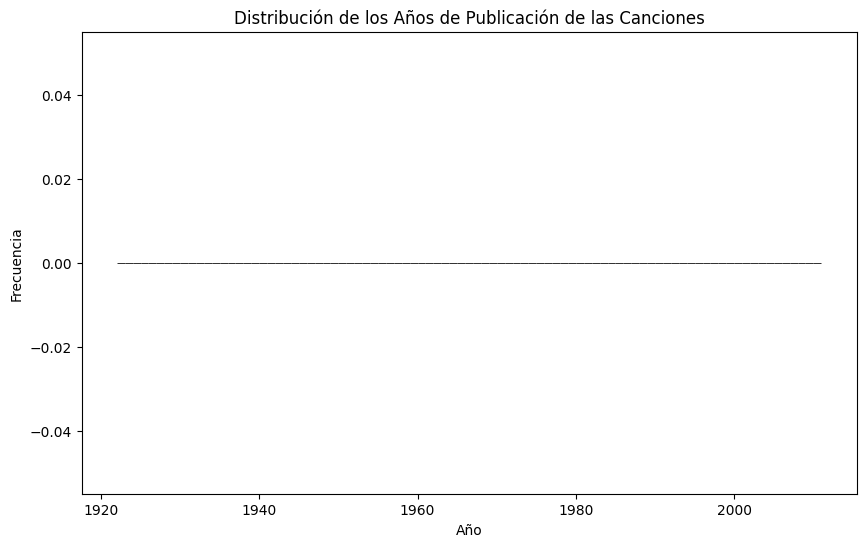

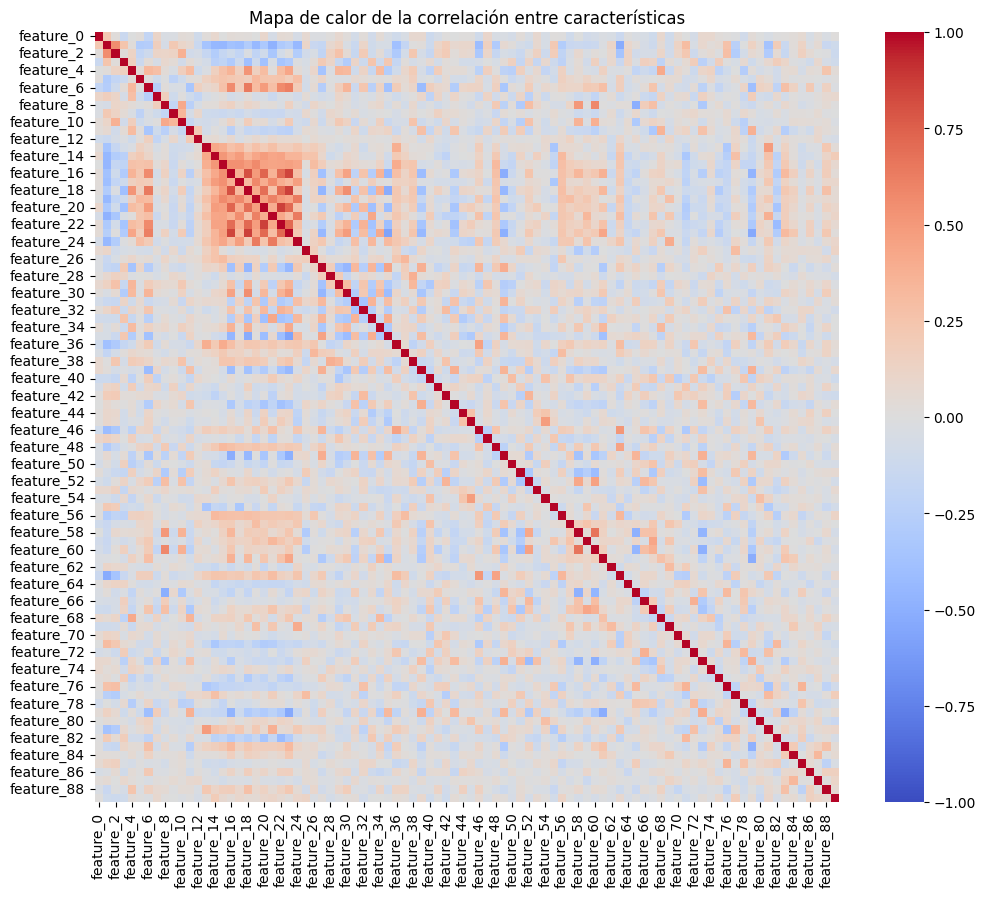

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que los datos se cargan correctamente en la variable 'datos'
# Convertir los datos de numpy array a DataFrame para un manejo más sencillo
columnas = ['feature_' + str(i) for i in range(90)] + ['year']
df = pd.DataFrame(datos, columns=columnas)

# Ver las primeras filas del DataFrame para confirmar la correcta carga
print(df.head())

# Descripción básica de los datos
print("Descripción de los datos:")
print(df.describe())

# Histograma del año de publicación
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=range(1922, 2012), kde=False, color='blue')
plt.title('Distribución de los Años de Publicación de las Canciones')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

# Correlación entre características
plt.figure(figsize=(12, 10))
sns.heatmap(df.iloc[:, :-1].corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de la correlación entre características')
plt.show()


2. Preprocesado de datos
En este apartado, abordaremos el preprocesamiento necesario para los datos, incluyendo la normalización, manejo de valores atípicos y la reducción de la dimensionalidad.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Escalado de características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df.iloc[:, :-1])

# Aplicación de PCA para reducción de dimensionalidad
pca = PCA(n_components=0.95)
features_reduced = pca.fit_transform(features_scaled)

print(f'Reducido de {features_scaled.shape[1]} a {features_reduced.shape[1]} características')

# Actualizar el DataFrame
df_reduced = pd.DataFrame(features_reduced, columns=[f'PC{i+1}' for i in range(features_reduced.shape[1])])
df_reduced['year'] = df['year']


Reducido de 90 a 67 características


3. Definición del protocolo de validación experimental
El protocolo de validación incluirá la división de los datos y la definición de métricas de evaluación adecuadas.

In [ ]:
from sklearn.model_selection import train_test_split

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df_reduced.iloc[:, :-1], df_reduced['year'], test_size=0.2, random_state=42
)

# Definir métricas de evaluación - Aquí usaremos el error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error


4. Selección de modelos de aprendizaje automático.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Inicialización de modelos
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_lr = LinearRegression()
model_svr = SVR(kernel='linear')


5. Selección y estimación de valores para hiperparámetros
Usaremos la búsqueda en cuadrícula para el modelo ensemble, en este caso, Random Forest.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


In [ ]:
# Configuración de los parámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search_rf.fit(X_train, y_train)
print("Mejores parámetros para RandomForest:", grid_search_rf.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
# Configuración de los parámetros para Ridge Regression
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}
ridge_model = Ridge()
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_ridge.fit(X_train, y_train)
print("Mejores parámetros para Ridge Regression:", grid_search_ridge.best_params_)



In [ ]:
# Configuración de los parámetros para SVR
param_grid_svr = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf']
}
svr_model = SVR()
grid_search_svr = GridSearchCV(svr_model, param_grid_svr, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_svr.fit(X_train, y_train)
print("Mejores parámetros para SVR:", grid_search_svr.best_params_)

6. Entrenamiento y estimación del error fuera de la muestra
Entrenamiento final y evaluación de los modelos seleccionados.

In [ ]:
# Entrenamiento del modelo Random Forest con los mejores parámetros
model_rf_best = RandomForestRegressor(**grid_search_rf.best_params_, random_state=42)
model_rf_best.fit(X_train, y_train)
y_pred_rf = model_rf_best.predict(X_test)

In [ ]:
# Entrenamiento del modelo Ridge con los mejores parámetros
model_ridge_best = Ridge(**ridge_grid.best_params_)
model_ridge_best.fit(X_train, y_train)
y_pred_ridge = model_ridge_best.predict(X_test)

In [ ]:
# Entrenamiento del modelo SVR con los mejores parámetros
model_svr_best = SVR(**svm_grid.best_params_)
model_svr_best.fit(X_train, y_train)
y_pred_svr = model_svr_best.predict(X_test)

In [ ]:
# Calcular MSE y R² para Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Calcular MSE y R² para Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Calcular MSE y R² para SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Imprimir los resultados
print(f'MSE para Random Forest: {mse_rf}, R^2: {r2_rf}')
print(f'MSE para Ridge Regression: {mse_ridge}, R^2: {r2_ridge}')
print(f'MSE para SVR: {mse_svr}, R^2: {r2_svr}')